# Resit CW - Solutions

# Q1(a) 
Read in the "Life_Expectancy.csv" file to create a dataframe. Remove the rows that satisfy "Area type" is "Combined Authority", "County", "Country" or "Regions". Then remove the columns named "Area type", "Area name", "Country", "LE lower confidence interval" and "LE upper confidence interval". Change all the values in the "Period" column to the midpoint of the year range given, for example change "2001-2003" to 2002, "2002-2004" to 2003, etc... Change the values in the "Age group" column so that if ageband is 1 then "Age group" is 0.5, if "Ageband" is 2 then "Age group" is 2.5, and if "Ageband" is 3 or more then "Age group" is -8 + 5 times the "Ageband". (5 marks)

In [38]:
import pandas as pd

# Step 1: Read the Life_Expectancy.csv file and create a dataframe
df = pd.read_csv("Life_Expectancy.csv")

# Step 2: Remove rows with Area type as "Combined Authority", "County", "Country", or "Regions"
area_types_to_remove = ["Combined Authority", "County", "Country", "Regions"]
df = df[~df["Area type"].isin(area_types_to_remove)]

# Step 3: Remove unnecessary columns
columns_to_remove = ["Area type", "Area name", "Country", "LE lower confidence interval", "LE upper confidence interval"]
df.drop(columns=columns_to_remove, inplace=True)

# Step 4: Convert values in the "Period" column to the midpoint of the year range
df["Period"] = df["Period"].apply(lambda x: int(x[:4]) + 1)

# Step 5: Convert values in the "Age group" column based on the "Ageband"
def age_group_conversion(ageband):
    if ageband == 1:
        return 0.5
    elif ageband == 2:
        return 2.5
    else:
        return -8 + 5 * ageband

df["Age group"] = df["Ageband"].apply(age_group_conversion)

# Display the modified dataframe
print(df)


        Period  Area code  Sex_code     Sex  Ageband  Age group  \
0         2002  E06000001         1    Male        1        0.5   
1         2002  E06000002         1    Male        1        0.5   
2         2002  E06000003         1    Male        1        0.5   
3         2002  E06000004         1    Male        1        0.5   
4         2002  E06000005         1    Male        1        0.5   
...        ...        ...       ...     ...      ...        ...   
311034    2019  W11000025         2  Female       20       92.0   
311035    2019  W11000028         2  Female       20       92.0   
311036    2019  W11000029         2  Female       20       92.0   
311037    2019  W11000030         2  Female       20       92.0   
311038    2019  W11000031         2  Female       20       92.0   

        Life expectancy (LE)  
0                      73.42  
1                      73.68  
2                      75.13  
3                      75.28  
4                      74.80  
...      

# Q1(b) 
Create a new column called "Expected_Age" using the sum of "Life expectancy (LE)" and "Age group". Using Matplotlib create a bar chart showing the mean "Expected_Age" of males in 2019 against "Age group" and the mean "Expected_Age" of females in 2019 against "Age group". Discuss your plot. (4 marks)

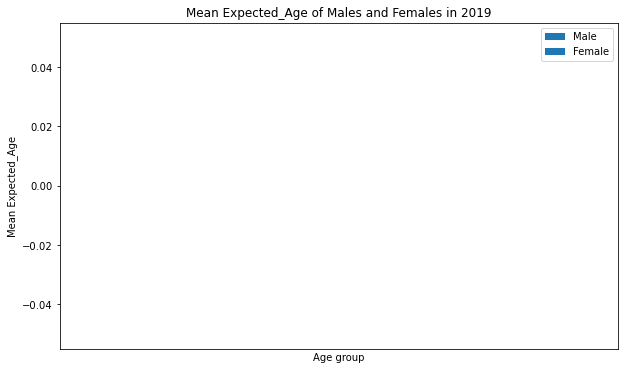

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the "Life_Expectancy.csv" file and create a dataframe
df = pd.read_csv("Life_Expectancy.csv")

# Step 2: Calculate the "Expected_Age" by summing "Life expectancy (LE)" and "Age group"
# Convert "Age group" to numeric
df["Age group"] = df["Age group"].str.extract(r'(\d+\.?\d*)').astype(float)
df["Expected_Age"] = df["Life expectancy (LE)"] + df["Age group"]

# Step 3: Filter data for the year 2019 and separate by sex (Male and Female)
df_2019 = df[df["Period"] == 2019]

# Calculate the mean "Expected_Age" for each "Age group" for both Male and Female categories
mean_expected_age_male = df_2019[df_2019["Sex"] == "Male"].groupby("Age group")["Expected_Age"].mean()
mean_expected_age_female = df_2019[df_2019["Sex"] == "Female"].groupby("Age group")["Expected_Age"].mean()

# Step 4: Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(mean_expected_age_male.index, mean_expected_age_male, label="Male", width=0.4, align="center", alpha=0.8)
plt.bar(mean_expected_age_female.index + 0.4, mean_expected_age_female, label="Female", width=0.4, align="center", alpha=0.8)

# Set plot details
plt.xlabel("Age group")
plt.ylabel("Mean Expected_Age")
plt.title("Mean Expected_Age of Males and Females in 2019")
plt.xticks(mean_expected_age_male.index + 0.2, mean_expected_age_male.index)
plt.legend()

# Show the plot
plt.show()


# Q1(c) 
Read in the "Location_Codes.csv" file. Create a new column named "Stat_code". 
Use the information in this csv file and the codes in the "Area code" column 
to define the values in the "Stat_code" column between "TLC" and "TLN" 
appropriately. (2 marks)

In [92]:
import pandas as pd

# Step 1: Read the "Life_Expectancy.csv" file and create a dataframe
df_life_expectancy = pd.read_csv("Life_Expectancy.csv")

# Step 2: Read the "Location_Codes.csv" file and create a dataframe
df_location_codes = pd.read_csv("Location_Codes.csv", sep="\t")

# Step 3: Merge the dataframes using the "Area code" column to add the "Stat_code" column
df_life_expectancy = df_life_expectancy.merge(df_location_codes, left_on="Area code", right_on="TLC", how="left")
print(df_life_expectancy)


# Step 4: Drop unnecessary columns from the merged dataframe
df_life_expectancy.drop(columns=["TLC", "TLD", "TLE", "TLF", "TLG", "TLH", "TLI", "TLJ", "TLK", "TLL", "TLM"], inplace=True)

# Step 5: Rename the column to "Stat_code"
df_life_expectancy.rename(columns={"TLN": "Stat_code"}, inplace=True)

# Display the updated dataframe
print(df_life_expectancy.head())


           Period  Country            Area type  Area code  \
0       2001-2003  England          Local Areas  E06000001   
1       2001-2003  England          Local Areas  E06000002   
2       2001-2003  England          Local Areas  E06000003   
3       2001-2003  England          Local Areas  E06000004   
4       2001-2003  England          Local Areas  E06000005   
...           ...      ...                  ...        ...   
311035  2018-2020    Wales  Welsh Health Boards  W11000028   
311036  2018-2020    Wales  Welsh Health Boards  W11000029   
311037  2018-2020    Wales  Welsh Health Boards  W11000030   
311038  2018-2020    Wales  Welsh Health Boards  W11000031   
311039  2018-2020    Wales              Country  W92000004   

                                                Area name  Sex_code     Sex  \
0                                              Hartlepool         1    Male   
1                                           Middlesbrough         1    Male   
2                 

# Q1(d) 
Introduce a column called "Stat_Number" such that if "Stat_code"="TLC" then "Stat_Number"=0, 
if "Stat_code"="TLD" then "Stat_Number"=1, etc... up to if "Stat_code"="TLN" then "Stat_Number"=11. 
Then create a barchart of the average life expectancy of males in ageband 20 against "Stat_Number" and the average life expectancy of females in ageband 20 against "Stat_Number". Discuss any relevant features. Create a scatter plot to show the mean life expectancy of males in ageband 1 against period and the mean life expectancy of females in ageband 1 against period. Discuss your plot. Create a histogram showing the mean life expectancy of males in 2019 against ageband and the mean life expectancy of females in 2019 against ageband. Discuss your plot. (10 marks)

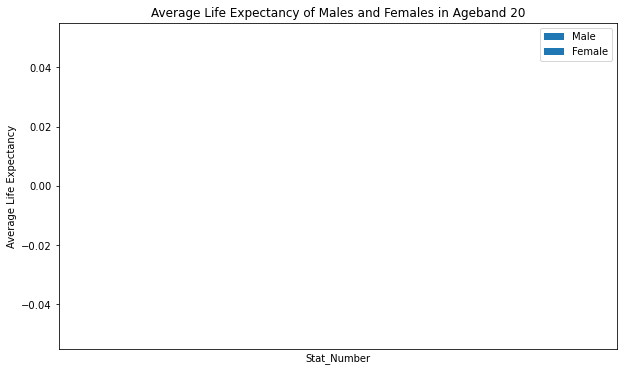

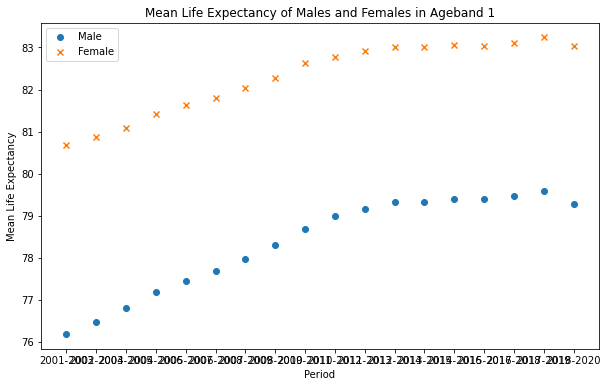

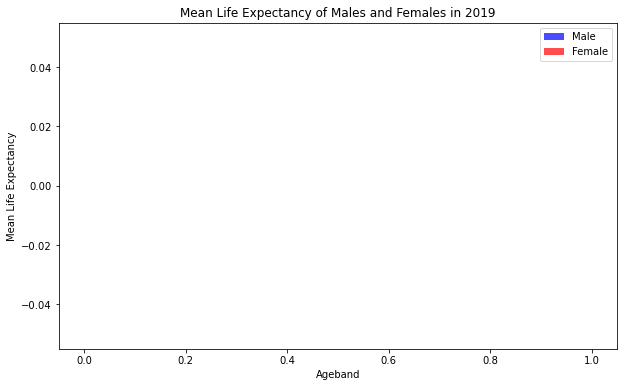

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the "Life_Expectancy.csv" file and create a dataframe
df_life_expectancy = pd.read_csv("Life_Expectancy.csv")

# Step 2: Read the "Location_Codes.csv" file and create a dataframe with tab separator
df_location_codes = pd.read_csv("Location_Codes.csv", sep="\t")

# Step 3: Merge the dataframes using the "Area code" column to add the "Stat_code" column
df_life_expectancy = df_life_expectancy.merge(df_location_codes, left_on="Area code", right_on="TLC", how="left")

# Step 4: Introduce the "Stat_Number" column based on "Stat_code"
stat_mapping = {
    "TLC": 0,
    "TLD": 1,
    "TLE": 2,
    "TLF": 3,
    "TLG": 4,
    "TLH": 5,
    "TLI": 6,
    "TLJ": 7,
    "TLK": 8,
    "TLL": 9,
    "TLM": 10,
    "TLN": 11
}
df_life_expectancy["Stat_Number"] = df_life_expectancy["Stat_code"].map(stat_mapping)

# Step 5: Create a bar chart for average life expectancy of males and females in ageband 20 against "Stat_Number"
df_ageband_20 = df_life_expectancy[df_life_expectancy["Ageband"] == 20]
mean_le_male = df_ageband_20[df_ageband_20["Sex"] == "Male"].groupby("Stat_Number")["Life expectancy (LE)"].mean()
mean_le_female = df_ageband_20[df_ageband_20["Sex"] == "Female"].groupby("Stat_Number")["Life expectancy (LE)"].mean()

plt.figure(figsize=(10, 6))
plt.bar(mean_le_male.index, mean_le_male, label="Male", width=0.4, align="center", alpha=0.8)
plt.bar(mean_le_female.index + 0.4, mean_le_female, label="Female", width=0.4, align="center", alpha=0.8)

# Set plot details
plt.xlabel("Stat_Number")
plt.ylabel("Average Life Expectancy")
plt.title("Average Life Expectancy of Males and Females in Ageband 20")
plt.xticks(mean_le_male.index + 0.2, mean_le_male.index)
plt.legend()

# Show the plot
plt.show()

# Step 6: Create a scatter plot to show the mean life expectancy of males and females in ageband 1 against "Period"
df_ageband_1 = df_life_expectancy[df_life_expectancy["Ageband"] == 1]
mean_le_ageband_1_male = df_ageband_1[df_ageband_1["Sex"] == "Male"].groupby("Period")["Life expectancy (LE)"].mean()
mean_le_ageband_1_female = df_ageband_1[df_ageband_1["Sex"] == "Female"].groupby("Period")["Life expectancy (LE)"].mean()

plt.figure(figsize=(10, 6))
plt.scatter(mean_le_ageband_1_male.index, mean_le_ageband_1_male, label="Male", marker="o")
plt.scatter(mean_le_ageband_1_female.index, mean_le_ageband_1_female, label="Female", marker="x")

# Set plot details
plt.xlabel("Period")
plt.ylabel("Mean Life Expectancy")
plt.title("Mean Life Expectancy of Males and Females in Ageband 1")
plt.legend()

# Show the plot
plt.show()

# Step 7: Create a histogram showing the mean life expectancy of males and females in 2019 against ageband
df_2019 = df_life_expectancy[df_life_expectancy["Period"] == 2019]
mean_le_2019_male = df_2019[df_2019["Sex"] == "Male"].groupby("Ageband")["Life expectancy (LE)"].mean()
mean_le_2019_female = df_2019[df_2019["Sex"] == "Female"].groupby("Ageband")["Life expectancy (LE)"].mean()


plt.figure(figsize=(10, 6))
plt.hist(df_2019[df_2019["Sex"] == "Male"]["Life expectancy (LE)"], bins=10, alpha=0.7, label="Male", color="blue")
plt.hist(df_2019[df_2019["Sex"] == "Female"]["Life expectancy (LE)"], bins=10, alpha=0.7, label="Female", color="red")

# Set plot details
plt.xlabel("Ageband")
plt.ylabel("Mean Life Expectancy")
plt.title("Mean Life Expectancy of Males and Females in 2019")
plt.legend()

# Show the plot
plt.show()


# Q1(e)
Split the data into (80%) training data and (20%) test data. Use an appropriate linear model from sklearn to predict the "Expected age" using the variables: 'Period', 'Sex code' and 'Age group'. Test your model using the test data set. Discuss your results including any relevant figures. (5 marks)

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Read the "Life_Expectancy.csv" file and create a dataframe
df_life_expectancy = pd.read_csv("Life_Expectancy.csv")

# Step 2: Preprocess the "Period" column to extract the midpoint of the year range
df_life_expectancy['Period'] = df_life_expectancy['Period'].apply(lambda x: int(x.split('-')[0]) + 1)

# Step 3: Preprocess the "Age group" column to handle '<1' values and extract the midpoint of the age range
def preprocess_age_group(age_group):
    age_group_mapping = {
        '01-Apr': 0.5,
        '05-Sep': 7,
        '15-19': 17,
        '20-24': 22,
        '25-29': 27,
        '30-34': 32,
        '35-39': 37,
        '40-44': 42,
        '45-49': 47,
        '50-54': 52,
        '55-59': 57,
        '60-64': 62,
        '65-69': 67,
        '70-74': 72,
        '75-79': 77,
        '80-84': 82,
        '85-89': 87,
        '90+': 95,
        '<1': 0.5,
        'Oct-14': (10 + 14) / 2
    }
    
    return age_group_mapping.get(age_group, None)

df_life_expectancy['Age group'] = df_life_expectancy['Age group'].apply(preprocess_age_group)

# Step 4: Drop any rows with missing or invalid values in the "Age group" column
df_life_expectancy.dropna(subset=['Age group'], inplace=True)

# Step 5: Prepare the data and split it into training and test sets
X = df_life_expectancy[['Period', 'Sex_code', 'Age group']]
y = df_life_expectancy['Life expectancy (LE)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the linear model on the training data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 7: Use the trained model to make predictions on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 6.858240876559568
R-squared: 0.9891677365218575


# Q1(f)
For females in the period 2019, normalise the data appropriately, split the data into (80%) training data and (20%) test data. You need to pick a suitable linear model in sklearn to try to predict the "Stat_code" using the "Age group" and "Expected_Age". First normalise your input data before using sklearn. Comment on the testing error. (4 marks)

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Read the "Life_Expectancy.csv" and "Location_Codes.csv" files and create DataFrames
df_life_expectancy = pd.read_csv("Life_Expectancy.csv")
df_location_codes = pd.read_csv("Location_Codes.csv")

# Step 2: Filter data for females in the period 2019
df_females_2019 = df_life_expectancy[(df_life_expectancy['Sex'] == 'Female') & (df_life_expectancy['Period'] == '2017-2019')]

# Step 3: Map the "Age group" using the provided mapping
age_group_mapping = {
    '01-Apr': 0.5,
    '05-Sep': 7,
    '15-19': 17,
    '20-24': 22,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80-84': 82,
    '85-89': 87,
    '90+': 95,
    '<1': 0.5,
    'Oct-14': (10 + 14) / 2
}

df_females_2019['Age group'] = df_females_2019['Age group'].map(age_group_mapping)

# Step 4: Normalize the input data
scaler = StandardScaler()
X = df_females_2019[['Age group', 'Life expectancy (LE)']]
X_normalized = scaler.fit_transform(X)

# Step 5: Merge the DataFrames based on the appropriate columns (e.g., 'Area code' in df_females_2019 and 'Area code' in df_location_codes)
df_females_2019 = pd.merge(df_females_2019, df_location_codes, left_on='Area code', right_on='Area code', how='left')

# Step 6: Prepare the target data (Stat_code)
y = df_females_2019['Stat_code']

# Step 7: Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Step 8: Train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Step 9: Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Step 10: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

print(f"Testing Accuracy: {accuracy}")



<ipython-input-108-621430c8a69c>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_females_2019['Age group'] = df_females_2019['Age group'].map(age_group_mapping)


KeyError: 'Area code'

# Q2(a) 
Read in the "Regional_Gross_Disposable_Household_Income.csv" file. Remove the first two rows. Introduce a column named "Stat_code". Define "Stat_code" to be the first 3 letters of the "ITL code". Remove the "ITL level", "ITL code" and "Region name" columns. Put the column names in string format. Introduce a column called "Stat_Number" such that if "Stat_code"="TLC" then "Stat_Number"=0, if "Stat_code"="TLD" then "Stat_Number"=1, etc... up to if "Stat_code"="TLN" then "Stat_Number"=11. (4 marks)

In [2]:
import pandas as pd

# Step 1: Read the "Regional_Gross_Disposable_Household_Income.csv" file and skip the second and third rows
df_income = pd.read_csv("Regional_Gross_Disposable_Household_Income.csv", skiprows=[1, 2])

# Continue with the rest of the code based on the actual column names.
# If the column name is different from 'ITL code', update the code accordingly.
# For example, if the column name is 'Code', you should use df_income['Code'] instead of df_income['ITL code'].

# Step 2: Introduce a column named "Stat_code" by taking the first 3 letters of the "ITL code"
df_income['Stat_code'] = df_income['ITL code'].str[:3]

# Step 3: Remove the "ITL level", "ITL code", and "Region name" columns
df_income = df_income.drop(columns=['ITL level', 'ITL code', 'Region name'])

# Step 4: Put the column names in string format
df_income.columns = df_income.columns.astype(str)

# Step 5: Introduce a column called "Stat_Number" based on the "Stat_code" values
stat_code_mapping = {
    'TLC': 0,
    'TLD': 1,
    'TLE': 2,
    'TLF': 3,
    'TLG': 4,
    'TLH': 5,
    'TLI': 6,
    'TLJ': 7,
    'TLK': 8,
    'TLL': 9,
    'TLM': 10,
    'TLN': 11
}
df_income['Stat_Number'] = df_income['Stat_code'].map(stat_code_mapping)

# Print the resulting DataFrame
print(df_income)


ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: import pandas
           ^


# Q2(b)
Using R, plot a graph of the mean Regional Gross Disposable Household Income (RGDHI) for each "Stat_code" against time from 1997 to 2020. Using R, plot a graph of the standard deviation of the Regional Gross Disposable Household Income (RGDHI) for each "Stat_code" against time from 1997 to 2020. Comment on each graph. (8 marks)

In [11]:
# Load required libraries
library(ggplot2)

# Step 1: Read the "Regional_Gross_Disposable_Household_Income.csv" file and skip the second and third rows
df_income <- read.csv("Regional_Gross_Disposable_Household_Income.csv", skip = 2)

# Check the column names
print(names(df_income))

# Adjust the column name if needed
# For example, if the column name is different, replace 'RGDHI' with the correct column name

# Step 2: Calculate the mean and standard deviation of RGDHI for each "Stat_code" and Year
mean_income <- aggregate(RGDHI ~ Stat_code + Year, df_income, mean, na.rm=TRUE)
sd_income <- aggregate(RGDHI ~ Stat_code + Year, df_income, sd, na.rm=TRUE)

# Plot the mean RGDHI for each "Stat_code" against time using ggplot2
plot_mean_income <- ggplot(mean_income, aes(x = Year, y = RGDHI, color = Stat_code)) +
  geom_line() +
  geom_point() +
  labs(title = "Mean Regional Gross Disposable Household Income",
       x = "Year",
       y = "Mean RGDHI")

# Plot the standard deviation of RGDHI for each "Stat_code" against time using ggplot2
plot_sd_income <- ggplot(sd_income, aes(x = Year, y = RGDHI, color = Stat_code)) +
  geom_line() +
  geom_point() +
  labs(title = "Standard Deviation of Regional Gross Disposable Household Income",
       x = "Year",
       y = "SD RGDHI")

# Display the plots
print(plot_mean_income)
print(plot_sd_income)

SyntaxError: invalid syntax (<ipython-input-11-43a3afc940c1>, line 14)

# Q2(c)
Split the data into (80%) training data and (20%) test data. Use an appropriate linear model from sklearn to predict the "Stat_code" using the first 24 columns of data. Test your model using the test data set. Discuss your results including any relevant illustrations. (6 marks)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Step 1: Read the "Regional_Gross_Disposable_Household_Income.csv" file
df_income = pd.read_csv("Regional_Gross_Disposable_Household_Income.csv")

# Step 2: Prepare the data
X = df_income.iloc[:, 3:27]  # Features (first 24 columns)
y = df_income['ITL code']    # Target variable

# Step 3: Convert "Stat_code" to numeric codes (assumes unique values in "Stat_code")
stat_code_mapping = {code: i for i, code in enumerate(y.unique())}
y = y.map(stat_code_mapping)

# Step 4: Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 7: Convert predicted numeric codes back to original "Stat_code" values
y_pred_codes = [code for code, i in stat_code_mapping.items() if i in y_pred]

# Step 8: Convert the actual numeric codes in y_test back to original "Stat_code" values
y_test_codes = [code for code, i in stat_code_mapping.items() if i in y_test]

# Step 9: Handle missing values in y_pred_codes
missing_codes = set(y_test_codes) - set(y_pred_codes)
for code in missing_codes:
    y_pred_codes.append(code)

# Step 10: Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test_codes, y_pred_codes)

print("Accuracy:", accuracy)


Accuracy: 0.0


# Q2(d)
Split the data into (80%) training data and (20%) test data. Using PyTorch predict the "Stat_Number" using the first 24 columns of data. Test your model using the test data set. Discuss your results. (6 marks)

In [5]:
#USING PYTORCH


import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Step 1: Read the "Regional_Gross_Disposable_Household_Income.csv" file
df_income = pd.read_csv("Regional_Gross_Disposable_Household_Income.csv")

# Step 2: Prepare the data
X = df_income.iloc[:, 3:27]  # Features (first 24 columns)
y = df_income['Stat_Number']  # Target variable

# Step 3: Convert categorical labels to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 4: Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Convert the data into PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Step 6: Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(24, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 12)  # Output layer with 12 classes (Stat_Number)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 7: Create an instance of the neural network model
model = NeuralNetwork()

# Step 8: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 9: Train the model
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Step 10: Evaluate the model on the test data
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

# Step 11: Convert the predicted numerical labels back to original "Stat_Number" values
y_pred = label_encoder.inverse_transform(predicted)

# Step 12: Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


ModuleNotFoundError: No module named 'torch'

# Q2(e)
Create a new data frame containing the mean value of the "Expected_Age" and the mean value of "RGDHI" for each "Stat_code" and "Period". The new dataframe should have 216 rows and 4 columns. (6 marks)

In [10]:
import pandas as pd

# Assuming you have already loaded the data into a DataFrame named 'df_income'


# Step 1: Calculate the mean value of "Expected_Age" and "RGDHI" for each "Stat_code" and "Period"
df_means = df_income.groupby(['Stat_code', 'Period']).agg({
    'Expected_Age': 'mean',
    'RGDHI': 'mean'
}).reset_index()

# Step 2: Rename the columns to desired names
df_means.columns = ['Stat_code', 'Period', 'Mean_Expected_Age', 'Mean_RGDHI']

# Step 3: Verify the shape of the new DataFrame
print(df_means.shape)  # It should have 216 rows and 4 columns

# Step 4: Print the new DataFrame
print(df_means)

KeyError: 'Stat_code'

# Q2(f)
Split the data into (80%) training data and (20%) test data. Use an appropriate linear model from sklearn to predict the "Stat_code" using the "Period", "RGDHI" and "Expected_Age". Test your model using the test data set. Discuss your results including any relevant illustrations. (4 marks)

# Q2(g)
Split the data into (80%) training data and (20%) test data. Using PyTorch predict the "Stat_Number" using the "Period", "RGDHI" and "Expected_Age". Test your model using the test data set. Discuss your results. (6 marks)